In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA #Principal component analysis
import matplotlib.pyplot as plt
from IPython.display import clear_output
from collections import Counter
from sklearn.cluster import KMeans
import random 

In [2]:
football_players = pd.read_csv("players_20.csv")
print(football_players.head())
flattened_positions = football_players['player_positions'].str.split(', ').explode()
print(flattened_positions)

unique_values_count = flattened_positions.unique()
print(unique_values_count)

st_count = (flattened_positions == 'ST').sum()
cf_count = (flattened_positions == 'CF').sum()
lf_count = (flattened_positions == 'LF').sum()
rf_count = (flattened_positions == 'RF').sum()
lw_count = (flattened_positions == 'LW').sum()
rw_count = (flattened_positions == 'RW').sum()

cb_count = (flattened_positions == 'CB').sum()
lb_count = (flattened_positions == 'LB').sum()
rb_count = (flattened_positions == 'RB').sum()
lwb_count = (flattened_positions == 'LWB').sum()
rwb_count = (flattened_positions == 'RWB').sum()

gk_count = (flattened_positions == 'GK').sum()

cm_count = (flattened_positions == 'CM').sum()
cam_count = (flattened_positions == 'CAM').sum()
cdm_count = (flattened_positions == 'CDM').sum()
lm_count = (flattened_positions == 'LM').sum()
rm_count = (flattened_positions == 'RM').sum()

Attackers = st_count+cf_count+lf_count+rf_count+lw_count+rw_count
Midfeilder = cm_count+cam_count+cdm_count+lm_count+rm_count
Deffence = cb_count+lb_count+rb_count+lwb_count+rwb_count
Goalkeeper = gk_count
print("Attackers", Attackers)
print("Midfeild", Midfeilder)
print("Deffence", Deffence)
print("Goalkeeper", Goalkeeper)


   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     183277  https://sofifa.com/player/183277/eden-hazard/2...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, CF, ST   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
2          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
3          E. Hazard                          Eden Hazard           LW, CF   
4       K. De Bruyne                      Kevin De Bruyne          CAM, CM   

   overall  potential    value_eur  wage_eur  age  ...   lcb    cb   rcb  \
0       94         94   95500000.0  560000.0   32  .

In [3]:
objective_features = ["attacking_crossing", "attacking_finishing", "attacking_short_passing", "skill_dribbling", "skill_curve", "skill_long_passing", "skill_ball_control", "movement_acceleration", "movement_sprint_speed", "movement_agility", "movement_reactions", "movement_balance", "power_shot_power", "power_stamina","defending_marking_awareness", "goalkeeping_kicking", "goalkeeping_handling"]
football_players = football_players.dropna(subset = objective_features)

In [4]:
data = football_players[objective_features].copy()
data.head()



,attacking_crossing,attacking_finishing,attacking_short_passing,skill_dribbling,skill_curve,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_stamina,defending_marking_awareness,goalkeeping_kicking,goalkeeping_handling
0,88,95,92,97,93,92,96,91,84,93,95,95,86,75,33,15,11
1,84,94,83,89,81,77,92,89,91,87,96,71,95,85,28,15,11
2,87,87,87,96,88,81,95,94,89,96,92,84,80,81,27,15,9
3,81,84,89,95,83,83,94,94,88,95,90,94,82,84,34,6,12
4,93,82,92,86,85,91,91,77,76,78,91,76,91,89,68,5,13


/Users/vrampapyan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vrampapyan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vrampapyan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vrampapyan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

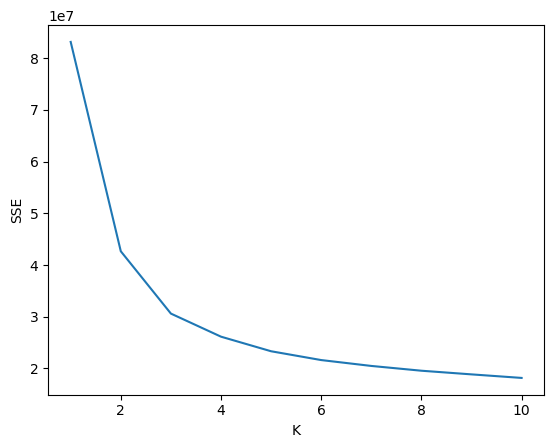

In [6]:
k_range = range(1,11)
sse = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(data)
    sse.append(km.inertia_)
sse
    
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(k_range, sse)

1. Scaling the values 
2. Random centroids
3. Cluster each data(label)
4. Update centroid
5. Repeat 3 4 

In [7]:
data = ((data-data.min())/ (data.max()-data.min())) * 9 + 1
# Scaling data values from 1 - 10 
# We do not want to get any value 0, as it will affect in the calculation of the euclidean distance 

In [8]:
data.describe()

,attacking_crossing,attacking_finishing,attacking_short_passing,skill_dribbling,skill_curve,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_stamina,defending_marking_awareness,goalkeeping_kicking,goalkeeping_handling
count,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000
mean,5.568956,5.215340,6.474896,5.988942,5.220107,5.792665,6.283089,6.536336,6.653658,6.557440,5.884636,6.491234,5.903016,6.385432,5.433549,2.488054,2.518490
std,1.873105,1.895098,1.553684,1.831100,1.882823,1.632831,1.655515,1.593068,1.573564,1.569220,1.096068,1.503656,1.480292,1.696433,1.942530,1.624074,1.679837
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.375000,3.709677,5.976471,5.451613,3.863636,4.750000,5.846154,5.658824,5.870588,5.658824,5.200000,5.658824,4.777778,5.658824,3.709677,1.684783,1.692308
50%,6.011364,5.548387,6.823529,6.516129,5.397727,6.142857,6.736264,6.823529,6.929412,6.823529,5.920000,6.717647,6.000000,6.717647,5.935484,1.978261,1.989011
75%,7.034091,6.806452,7.458824,7.193548,6.727273,7.000000,7.329670,7.670588,7.776471,7.670588,6.640000,7.564706,7.000000,7.564706,7.096774,2.271739,2.285714
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [9]:
data.head()

,attacking_crossing,attacking_finishing,attacking_short_passing,skill_dribbling,skill_curve,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_stamina,defending_marking_awareness,goalkeeping_kicking,goalkeeping_handling
0,9.488636,10.000000,10.000000,10.000000,9.897727,10.000000,10.000000,9.364706,8.729412,9.682353,9.88,9.788235,9.000000,7.670588,4.096774,2.369565,1.989011
1,9.079545,9.903226,9.047059,9.225806,8.670455,8.392857,9.604396,9.152941,9.470588,9.047059,10.00,7.247059,10.000000,8.729412,3.612903,2.369565,1.989011
2,9.386364,9.225806,9.470588,9.903226,9.386364,8.821429,9.901099,9.682353,9.258824,10.000000,9.52,8.623529,8.333333,8.305882,3.516129,2.369565,1.791209
3,8.772727,8.935484,9.682353,9.806452,8.875000,9.035714,9.802198,9.682353,9.152941,9.894118,9.28,9.682353,8.555556,8.623529,4.193548,1.489130,2.087912
4,10.000000,8.741935,10.000000,8.935484,9.079545,9.892857,9.505495,7.882353,7.882353,8.094118,9.40,7.776471,9.555556,9.152941,7.483871,1.391304,2.186813


Creating centroids

In [10]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centre = data.apply(lambda x: float(x.sample()))
        centroids.append(centre)
    return pd.concat(centroids, axis = 1)
centroids = random_centroids(data, 4)
centroids

/var/folders/kt/jxdw01y53gg4d39mmnj7snw00000gn/T/ipykernel_3572/566446000.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centre = data.apply(lambda x: float(x.sample()))


,0,1,2,3
attacking_crossing,1.818182,6.420455,7.340909,6.931818
attacking_finishing,6.903226,6.709677,4.870968,7.774194
attacking_short_passing,8.411765,8.200000,3.964706,8.729412
skill_dribbling,7.290323,1.677419,6.032258,6.612903
skill_curve,1.818182,6.522727,6.011364,6.011364
skill_long_passing,3.464286,5.714286,7.428571,2.500000
skill_ball_control,4.659341,2.879121,7.329670,7.626374
movement_acceleration,7.247059,5.870588,7.352941,8.411765
movement_sprint_speed,5.764706,7.352941,7.458824,6.400000
movement_agility,3.647059,4.917647,6.823529,5.764706


In [11]:
distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
distances

,0,1,2,3
0,17.473254,15.461015,13.385108,13.087324
1,15.968547,14.430233,11.958986,11.180008
2,16.538439,14.804001,12.354477,11.752555
3,16.041508,14.428041,12.163722,11.871971
4,16.391856,14.011062,10.972552,11.772990
...,...,...,...,...
18478,7.664220,8.218267,7.261944,8.533763
18479,7.628816,7.998147,7.324612,8.250118
18480,7.673676,9.637748,8.083847,9.119427
18481,9.029103,11.007676,9.608467,9.667268


In [12]:
print(distances.idxmin(axis = 1))

0        3
1        3
2        3
3        3
4        2
        ..
18478    2
18479    2
18480    0
18481    0
18482    0
Length: 18483, dtype: int64


In [13]:
def get_cluseters(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
    return distances.idxmin(axis = 1)

clusters = get_cluseters(data, centroids)
clusters

0        3
1        3
2        3
3        3
4        2
        ..
18478    2
18479    2
18480    0
18481    0
18482    0
Length: 18483, dtype: int64

In [14]:
clusters.value_counts()

2    11766
0     3345
3     3250
1      122
Name: count, dtype: int64

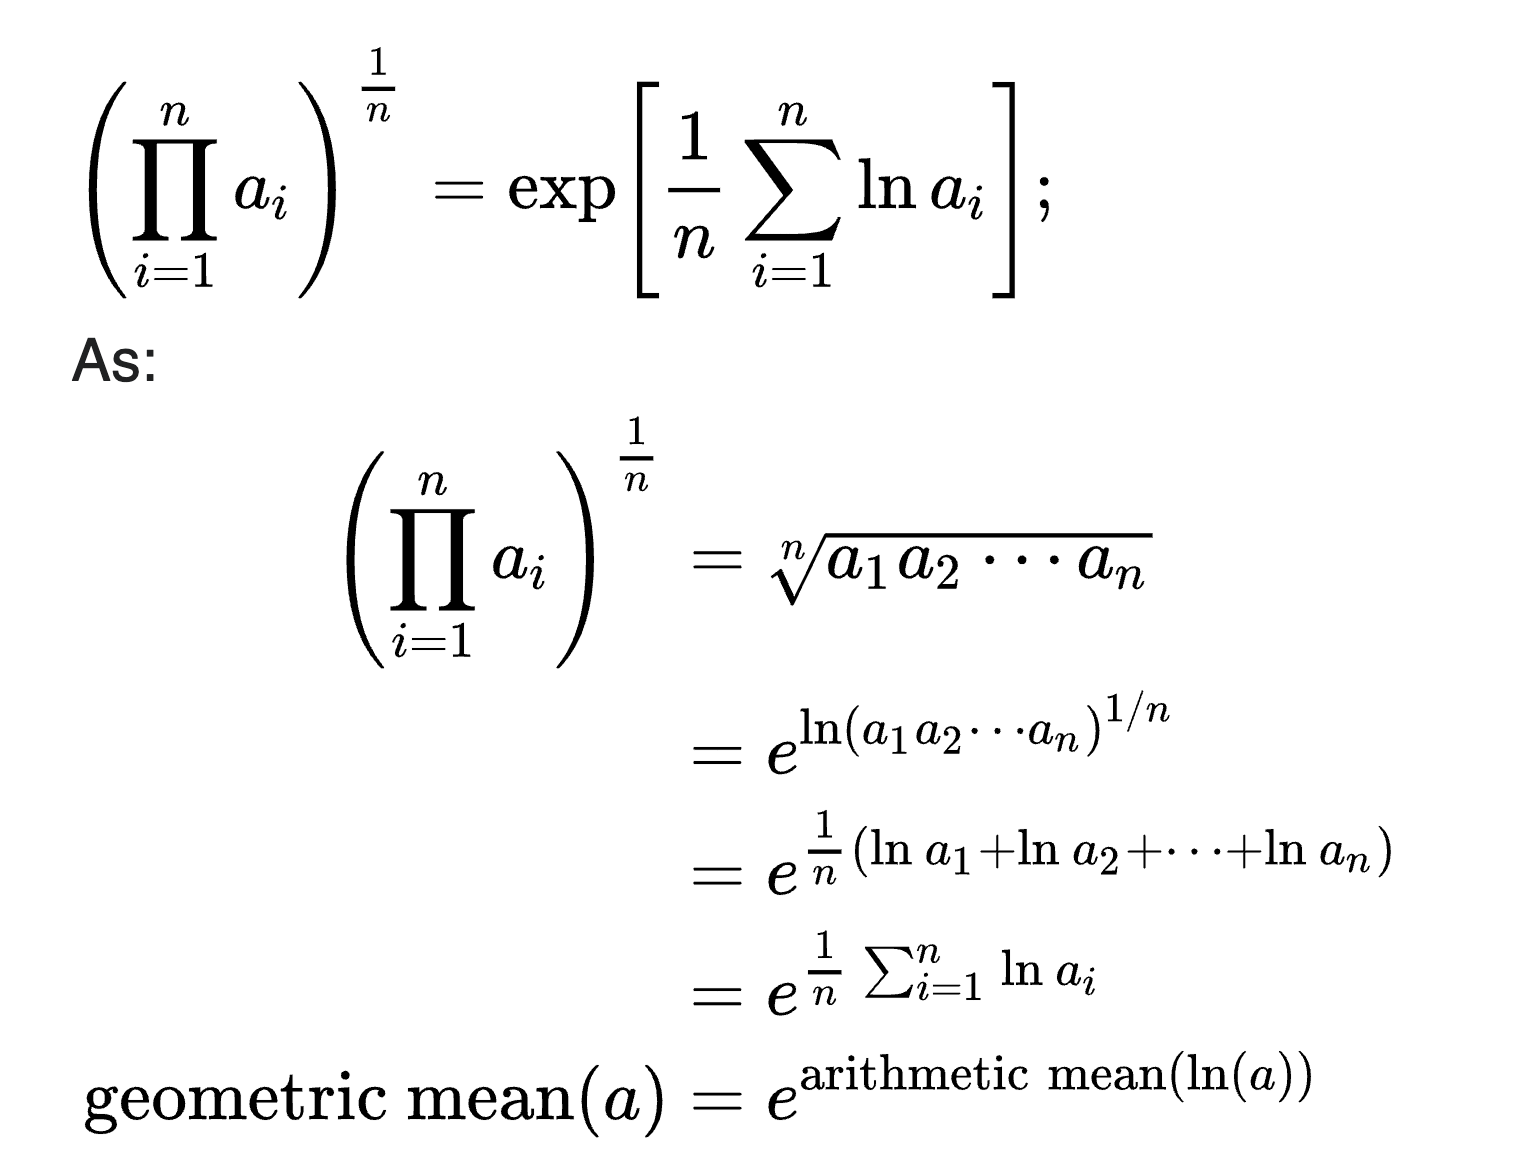

In [15]:
def new_centroids(data, clusters):  
    centroids = data.groupby(clusters).apply(lambda x:np.exp(np.log(x).mean())).T
    return centroids

In [17]:
def plot_clusters(data, clusters, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=clusters)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1], c="red")
    plt.show()

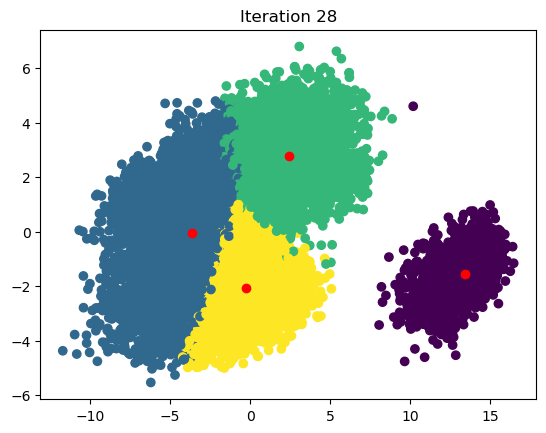

In [18]:
max_iterations = 100
k = 4
centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    clusters = get_cluseters(data, centroids)
    centroids = new_centroids(data, clusters)
    plot_clusters(data, clusters, centroids, iteration)
    iteration += 1


In [35]:
centroids

,0,1,2,3
attacking_crossing,5.176016,4.572006,1.896892,6.908262
attacking_finishing,6.356119,3.600155,1.889381,6.081923
attacking_short_passing,6.205466,6.088426,3.011046,7.491665
skill_dribbling,6.469422,4.938046,1.886499,7.158227
skill_curve,5.220637,3.838318,1.828847,6.495640
skill_long_passing,4.983721,5.308355,2.796041,6.881106
skill_ball_control,6.505344,5.653194,2.385511,7.338249
movement_acceleration,6.925572,5.757477,3.507356,7.235922
movement_sprint_speed,7.076116,5.970918,3.635742,7.293249
movement_agility,6.783588,5.455024,3.863229,7.436026


In [36]:
cluster_0 = football_players[clusters == 0][["short_name", "player_positions"]+ objective_features]
cluster_1 = football_players[clusters == 1][["short_name", "player_positions"]+ objective_features]
cluster_2 = football_players[clusters == 2][["short_name", "player_positions"]+ objective_features]
cluster_3 = football_players[clusters == 3][["short_name", "player_positions"]+ objective_features]

print(cluster_0["player_positions"])

260          ST
411          ST
420          ST
688          ST
706          ST
          ...  
18463    LW, LM
18464    RM, LM
18470        ST
18476        CM
18480        RM
Name: player_positions, Length: 3691, dtype: object


In [37]:
def most_frequency_list(data,col1,i):
    # get the target list
    df_list=data[col1]

    # Concatenate strings in the Series/Index with given separator
    list_string = df_list.str.cat(sep=';')
    
    # Split the strings with given separator
    list_split = list_string.split(';') 
    
    # Replace the leading or tailor space 
    list_split_all=[x.strip(' ') for x in list_split]
    
    # a container that keeps track of how many times equivalent values are added. The value can be accessed by dictionary API 
    
    #Create a container
    count = Counter(list_split_all) 
     # Create a unique_list
    unique_list=list(count.keys())
    
    # Return a list of the n most common elements and their counts from the most common to the least.
    most_frequent = count.most_common(i)
    print(most_frequent)
    
    # Create a DataFrame based on the most common list
    df_unique = pd.DataFrame(most_frequent, columns=['Item', 'totalCount']) 
    print(df_unique)
    sum_totalCount = df_unique["totalCount"].sum()
    print(sum_totalCount)
    

In [38]:
count_0 = most_frequency_list(cluster_0, "player_positions", 10)
# Attacker
print(Attackers,  2110)

[('ST', 1435), ('CM', 201), ('CAM', 166), ('RM', 121), ('LM', 116), ('ST, LW', 71), ('RM, LM', 69), ('ST, RW', 66), ('CAM, CM', 63), ('LM, RM', 63)]
      Item  totalCount
0       ST        1435
1       CM         201
2      CAM         166
3       RM         121
4       LM         116
5   ST, LW          71
6   RM, LM          69
7   ST, RW          66
8  CAM, CM          63
9   LM, RM          63
2371
5663 2110


In [39]:
count_2 = most_frequency_list(cluster_2, "player_positions", 10)
# Midfielder
print(Midfeilder, 3604)

[('GK', 2061), ('CB', 1)]
  Item  totalCount
0   GK        2061
1   CB           1
2062
13621 3604


In [40]:
count_3 = most_frequency_list(cluster_3, "player_positions", 10)
# Deffence
print(Goalkeeper, 2062)

[('CM, CDM', 605), ('CDM, CM', 602), ('CM', 480), ('LB', 434), ('ST', 386), ('RB', 372), ('CB', 232), ('CDM', 176), ('CAM, CM', 163), ('RM, LM', 154)]
      Item  totalCount
0  CM, CDM         605
1  CDM, CM         602
2       CM         480
3       LB         434
4       ST         386
5       RB         372
6       CB         232
7      CDM         176
8  CAM, CM         163
9   RM, LM         154
3604
2061 2062


In [41]:
count_1 = most_frequency_list(cluster_1, "player_positions", 10)
# Goalkeeper
print(Goalkeeper, 2061)

[('CB', 2106), ('LB', 218), ('CB, RB', 198), ('RB', 194), ('CDM', 175), ('CB, LB', 150), ('CB, CDM', 133), ('CDM, CM', 126), ('CM', 114), ('CDM, CB', 59)]
      Item  totalCount
0       CB        2106
1       LB         218
2   CB, RB         198
3       RB         194
4      CDM         175
5   CB, LB         150
6  CB, CDM         133
7  CDM, CM         126
8       CM         114
9  CDM, CB          59
3473
2061 2061


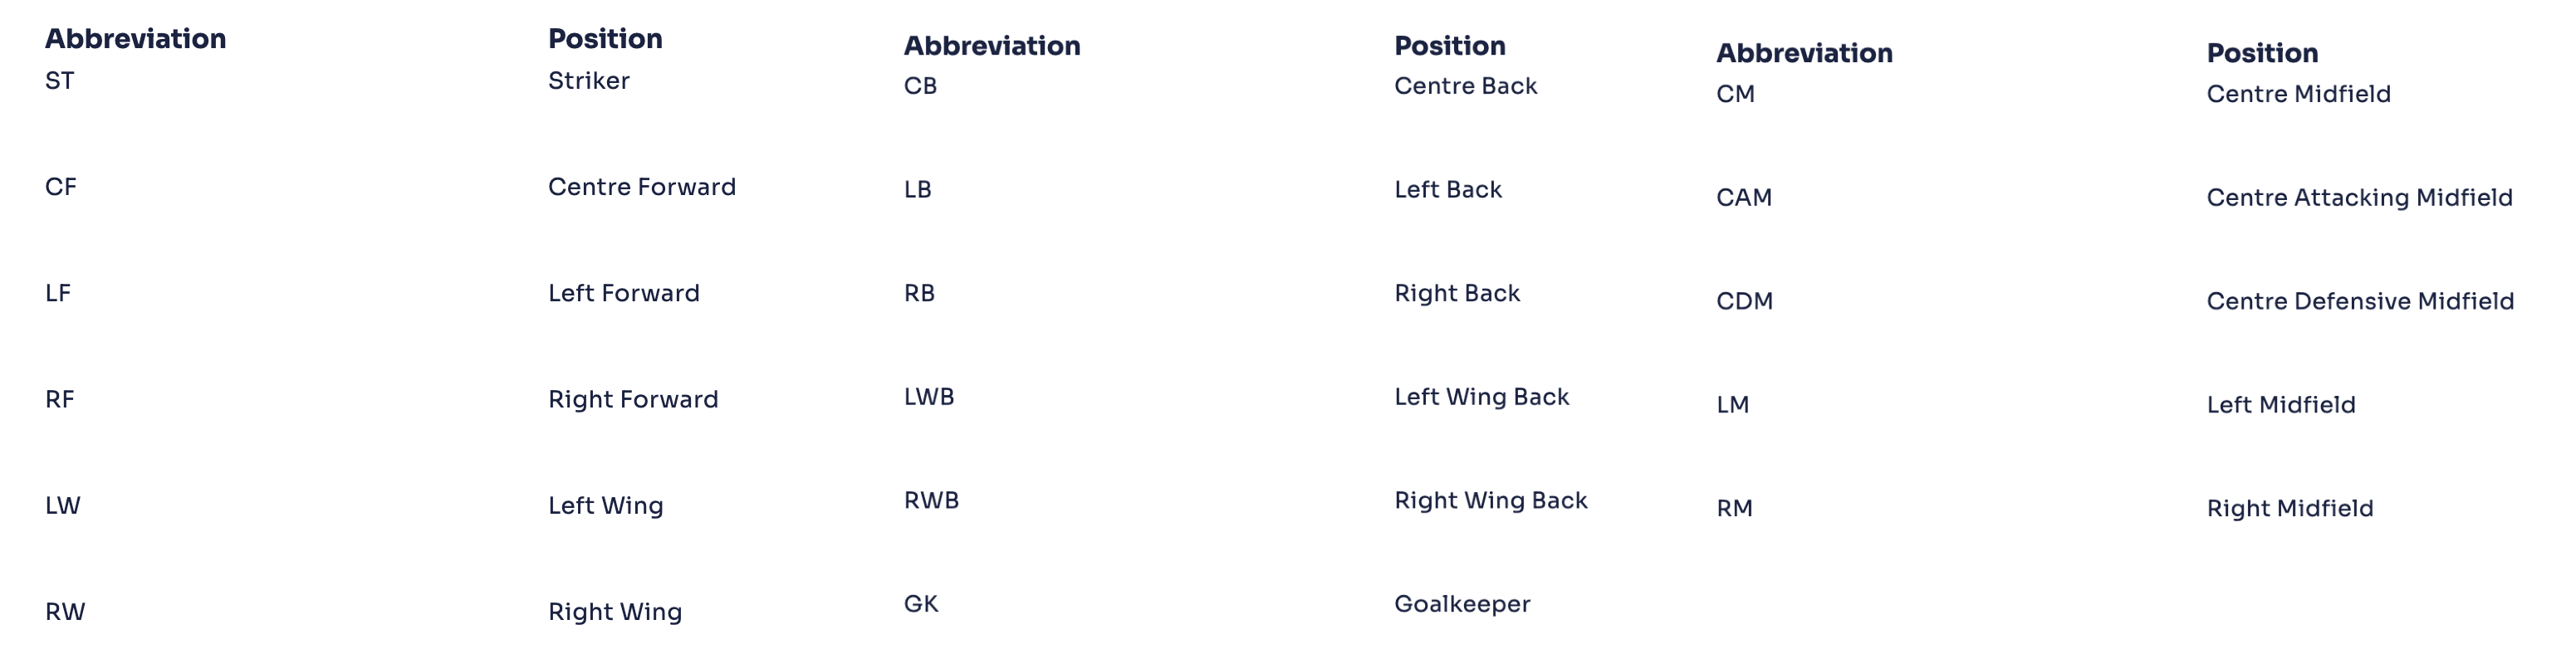

In [42]:
kmeans = KMeans(4)
kmeans.fit(data)

/Users/vrampapyan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [43]:
pd.DataFrame(kmeans.cluster_centers_, columns=objective_features).T

,0,1,2,3
attacking_crossing,5.568727,1.932656,7.129351,4.923170
attacking_finishing,6.513650,1.929633,6.328977,3.850480
attacking_short_passing,6.410897,3.117493,7.651027,6.301658
skill_dribbling,6.657317,1.931886,7.302918,5.244204
skill_curve,5.525036,1.872889,6.816845,4.125093
skill_long_passing,5.310957,2.917971,7.103509,5.616815
skill_ball_control,6.671557,2.451381,7.481744,5.860478
movement_acceleration,7.189539,3.714429,7.345727,5.989873
movement_sprint_speed,7.312230,3.838438,7.395239,6.192951
movement_agility,7.089337,4.039573,7.550879,5.742744


In [44]:
centroids

,0,1,2,3
attacking_crossing,5.176016,4.572006,1.896892,6.908262
attacking_finishing,6.356119,3.600155,1.889381,6.081923
attacking_short_passing,6.205466,6.088426,3.011046,7.491665
skill_dribbling,6.469422,4.938046,1.886499,7.158227
skill_curve,5.220637,3.838318,1.828847,6.495640
skill_long_passing,4.983721,5.308355,2.796041,6.881106
skill_ball_control,6.505344,5.653194,2.385511,7.338249
movement_acceleration,6.925572,5.757477,3.507356,7.235922
movement_sprint_speed,7.076116,5.970918,3.635742,7.293249
movement_agility,6.783588,5.455024,3.863229,7.436026
